# **Case Study 02: Clustering Analysis**
----
----
## **`Kelompok D`**

**Anggota Kelompok:**
| No | Nama | NIM |
|-------- |-------- | -------- |
| 1 | Maila Hayati Ependi  | 11230940000004   |
| 2 | nama | 112309400000   |
| 3 |Muhammad Saeful Anwar | 11210940000061   |


#**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
import warnings; warnings.simplefilter('ignore')

In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [ ]:
import pickle

#**Import Data**

In [ ]:
try :
  df = pd.read_csv('data/Case-Study-02-MixITup.csv', index_col = "ID")
except :
  !mkdir data
  !wget -P data/ https://raw.githubusercontent.com/saeful-anwar/Studi-case2-datmin/refs/heads/main/Case-Study-02-MixITup.csv
  df = pd.read_csv('data/Case-Study-02-MixITup.csv', index_col = "ID")

In [ ]:
df


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
ID,,,,,,,,,
101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...
296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7


#**Pendahuluan**

In [ ]:
# Menampilkan informasi umum data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 101 to 300
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         196 non-null    object 
 1   Umur                  200 non-null    object 
 2   Pendapatan-per-bulan  200 non-null    object 
 3   skor-pengeluaran      200 non-null    int64  
 4   Menikah               188 non-null    object 
 5   Kota                  200 non-null    object 
 6   Promo                 194 non-null    float64
 7   HariFav               200 non-null    object 
 8   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 15.6+ KB


In [ ]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,196,3,Wanita,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,200,45,32,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pendapatan-per-bulan,200,64,"Rp15,983,606",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skor-pengeluaran,200.0,NaN,NaN,NaN,50.47,26.07101,1.0,34.75,50.0,73.0,101.0
Menikah,188,4,1,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,200,4,Jakarta,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,194.0,NaN,NaN,NaN,1.685567,0.970603,0.0,1.0,1.0,3.0,5.0
HariFav,200,7,Senin,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,200.0,NaN,NaN,NaN,3.605,2.743466,0.0,1.0,3.5,6.0,9.0


In [ ]:
df.isnull().sum()


,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [ ]:
rows_with_missing = df[df.isnull().any(axis=1)]
print("Baris dengan missing values:")
rows_with_missing

Baris dengan missing values:


,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
ID,,,,,,,,,
111,Wanita,31,"Rp11,475,409",54,1,Jakarta,NaN,Senin,6
116,Wanita,51,"Rp11,885,245",50,NaN,Jakarta,1.0,Minggu,2
120,NaN,49,"Rp9,836,065",28,1,Tangerang,3.0,Sabtu,7
134,Wanita,38,"Rp21,311,475",40,NaN,Jakarta,2.0,Selasa,7
143,Pria,39,"Rp25,819,672",88,NaN,Depok,1.0,Minggu,0
148,NaN,36,"Rp29,508,196",10,1,Tangerang,3.0,Minggu,6
165,Wanita,31,"Rp10,245,901",42,1,Jakarta,NaN,Minggu,6
183,Wanita,31,"Rp27,049,180",93,NaN,Depok,0.0,Selasa,0
191,Wanita,36,"Rp29,508,196",27,NaN,Tangerang,3.0,Minggu,5


#**Preprocessing**

##**Mengubah Tipe Data**

In [ ]:
# Mengubah tipe data
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')

# Mengubah 'Pendapatan-per-bulan' ke string terlebih dahulu
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype(str)

# Lalu ubah string ke float64
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', '').str.replace('.', '').str.replace(',', '').astype('float64')


In [ ]:
# Memperbaiki typo pada kolom umur
df['Umur'] = df['Umur'].replace("35'", 35)

# Mengubah tipe data kolom umur menjadi integer
df['Umur'] = df['Umur'].astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 101 to 300
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         196 non-null    category
 1   Umur                  200 non-null    int64   
 2   Pendapatan-per-bulan  200 non-null    float64 
 3   skor-pengeluaran      200 non-null    int64   
 4   Menikah               188 non-null    category
 5   Kota                  200 non-null    category
 6   Promo                 194 non-null    category
 7   HariFav               200 non-null    category
 8   FavFlavor             200 non-null    category
dtypes: category(6), float64(1), int64(2)
memory usage: 8.9 KB


##**Mengecek Distribusi Nilai Kolom Tipe Kategorik**

In [ ]:
# Untuk memeriksa distribusi nilai dalam kolom-kolom bertipe kategorik
for col in df.select_dtypes(include='category').columns:
    print(f"Kolom: {col}")
    print(df[col].value_counts())
    print("\n")

Kolom: Jenis Kelamin
Jenis Kelamin
Wanita    109
Pria       86
-           1
Name: count, dtype: int64


Kolom: Menikah
Menikah
1    160
0     26
-      1
       1
Name: count, dtype: int64


Kolom: Kota
Kota
Jakarta      87
Depok        59
Tangerang    53
JJakarta      1
Name: count, dtype: int64


Kolom: Promo
Promo
1.0    86
3.0    50
2.0    43
0.0    14
5.0     1
Name: count, dtype: int64


Kolom: HariFav
HariFav
Senin     66
Sabtu     54
Minggu    43
Selasa    21
Kamis      6
Jumat      5
Rabu       5
Name: count, dtype: int64


Kolom: FavFlavor
FavFlavor
0    40
1    20
2    20
3    20
4    20
5    20
6    20
7    20
8    19
9     1
Name: count, dtype: int64




##**Mengecek dan Menangani Noise**

In [ ]:

# Menangani Noise
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta') # memperbaiki kesalahan penulisan
df = df[(df['FavFlavor'] != 9)]# Hapus baris di mana FavFlavour bernilai 9
df = df[(df['Promo'] != 5)] # Hapus baris di mana Promo bernilai 5
df = df[(df['skor-pengeluaran'] != 101)] # Hapus baris di mana skor-pengeluaran bernilai 101
df = df[(df['Pendapatan-per-bulan'] != 0) & (df['Pendapatan-per-bulan'].notna())] # Menghapus baris yang pendapatan perbulan bernilai 0

In [ ]:
df['Promo'] = df['Promo'].cat.remove_categories([5])
df['FavFlavor'] = df['FavFlavor'].cat.remove_categories([9])

## **Mengecek dan menangani outlier**

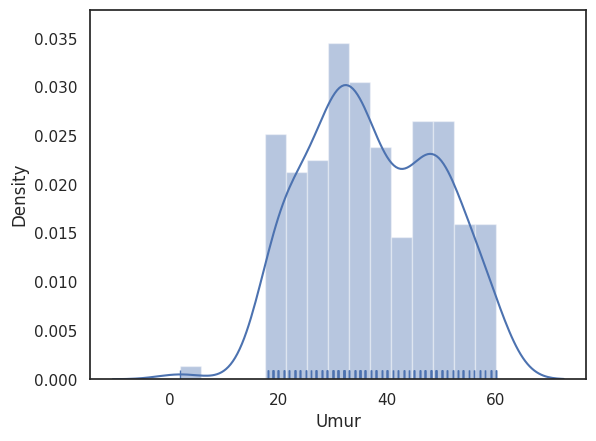

In [ ]:
# Cek Outlier pada Umur
import seaborn as sns
p = sns.distplot(df['Umur'], kde=True, rug=True, bins=15)

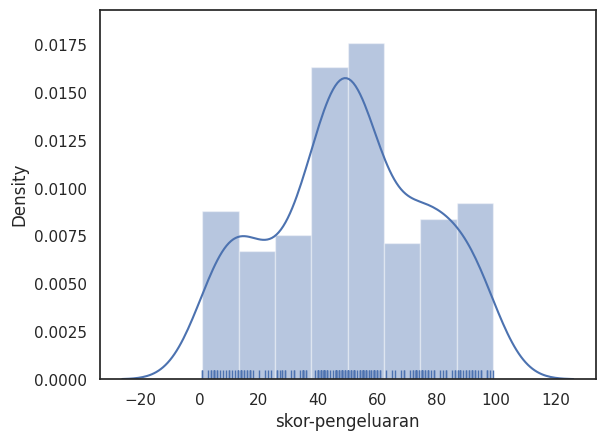

In [ ]:
# Cek Outlier pada skor-pengeluaran
import seaborn as sns
p = sns.distplot(df['skor-pengeluaran'], kde=True, rug=True)


## **Mengecek dan menangani missing value**

In [ ]:
df.isnull().sum()



,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,11
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [ ]:
# Menampilkan baris yang memiliki nilai null
df_with_mv = df[df.isnull().any(axis=1)]
df_with_mv

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
ID,,,,,,,,,
111,Wanita,31,11475409.0,54,1,Jakarta,NaN,Senin,6
116,Wanita,51,11885245.0,50,NaN,Jakarta,1.0,Minggu,2
120,NaN,49,9836065.0,28,1,Tangerang,3.0,Sabtu,7
134,Wanita,38,21311475.0,40,NaN,Jakarta,2.0,Selasa,7
143,Pria,39,25819672.0,88,NaN,Depok,1.0,Minggu,0
148,NaN,36,29508196.0,10,1,Tangerang,3.0,Minggu,6
165,Wanita,31,10245901.0,42,1,Jakarta,NaN,Minggu,6
183,Wanita,31,27049180.0,93,NaN,Depok,0.0,Selasa,0
191,Wanita,36,29508196.0,27,NaN,Tangerang,3.0,Minggu,5


In [ ]:
# Mengisi kolom "Jenis Kelamin" yang kosong dengan "wanita"
df['Jenis Kelamin'] = df['Jenis Kelamin'].fillna('Wanita')
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('-', 'Wanita')

# Mengisi kolom "Menikah" yang kosong dengan 1, karena rata-rata usia pernikahan di Indonesia saat umur 22
df['Menikah'] = df['Menikah'].fillna("1")
df['Menikah'] = df['Menikah'].replace(' ', '1')
df['Menikah'] = df['Menikah'].replace('-', '1')

# Mengisi kolom "Promo" yang kosong dengan 0
df['Promo'] = df['Promo'].fillna(0)

In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,195,2,Wanita,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,195.0,NaN,NaN,NaN,37.34359,11.895589,2.0,29.0,36.0,48.0,60.0
Pendapatan-per-bulan,195.0,NaN,NaN,NaN,18913408.533333,10654302.979194,409836.0,11270491.0,19262295.0,25819672.0,50000000.0
skor-pengeluaran,195.0,NaN,NaN,NaN,50.451282,25.832159,1.0,35.0,50.0,73.0,99.0
Menikah,195,2,1,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,195,3,Jakarta,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,195.0,4.0,1.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,195,7,Senin,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,195.0,9.0,0.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(195, 9)

# **EDA**

## **EDA tipe data numerik**

<Figure size 640x480 with 0 Axes>

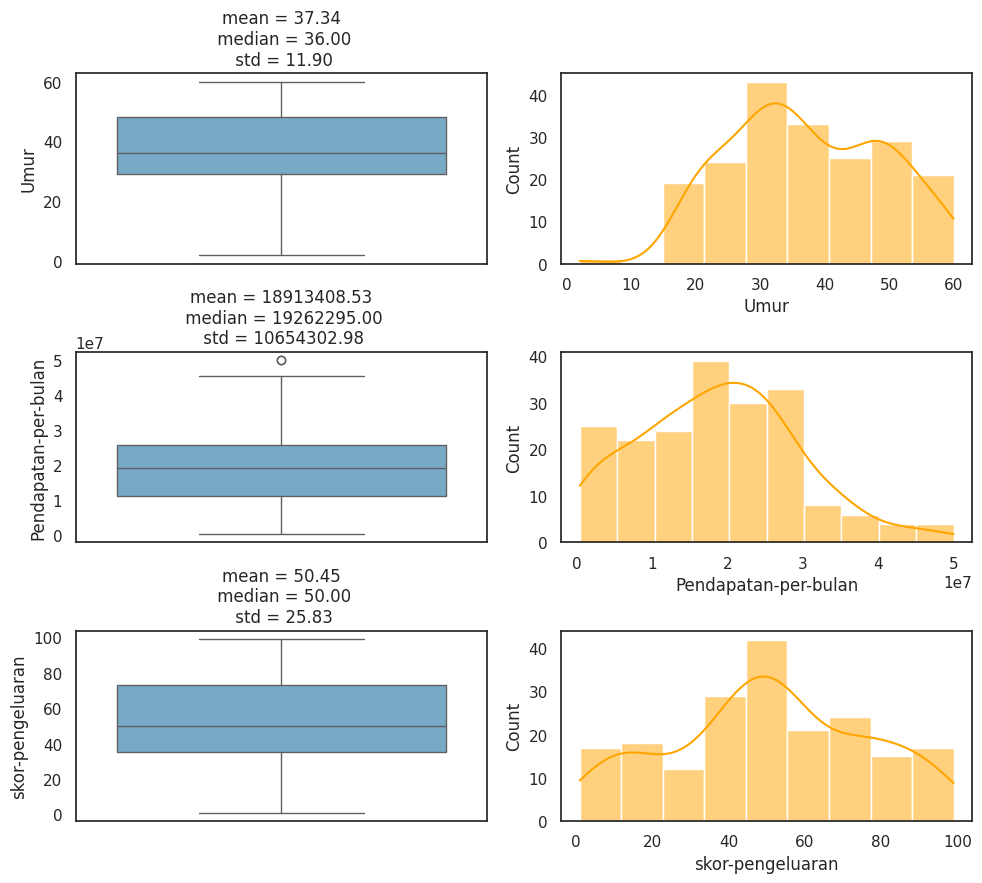

In [ ]:
kolom_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']
# Mengatur style
sns.set(style='white')
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        if i < 3:  # Pastikan kita tidak melebihi jumlah subplot

            # Membuat boxplot
            sns.boxplot(data=df, y=kol, ax=axs[i][0], palette='Blues')
            # Membuat histogram
            sns.histplot(df[kol], kde=True, ax=axs[i][1], color='orange')  # Menggunakan histplot dengan kde
            axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f' %
                                (df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
observasi_num(kolom_numerik)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  forward_navigation_events: bool or "auto"
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: list of `.AbstractPathEffect`
  picker: None or bool or float or 

<Figure size 640x480 with 0 Axes>

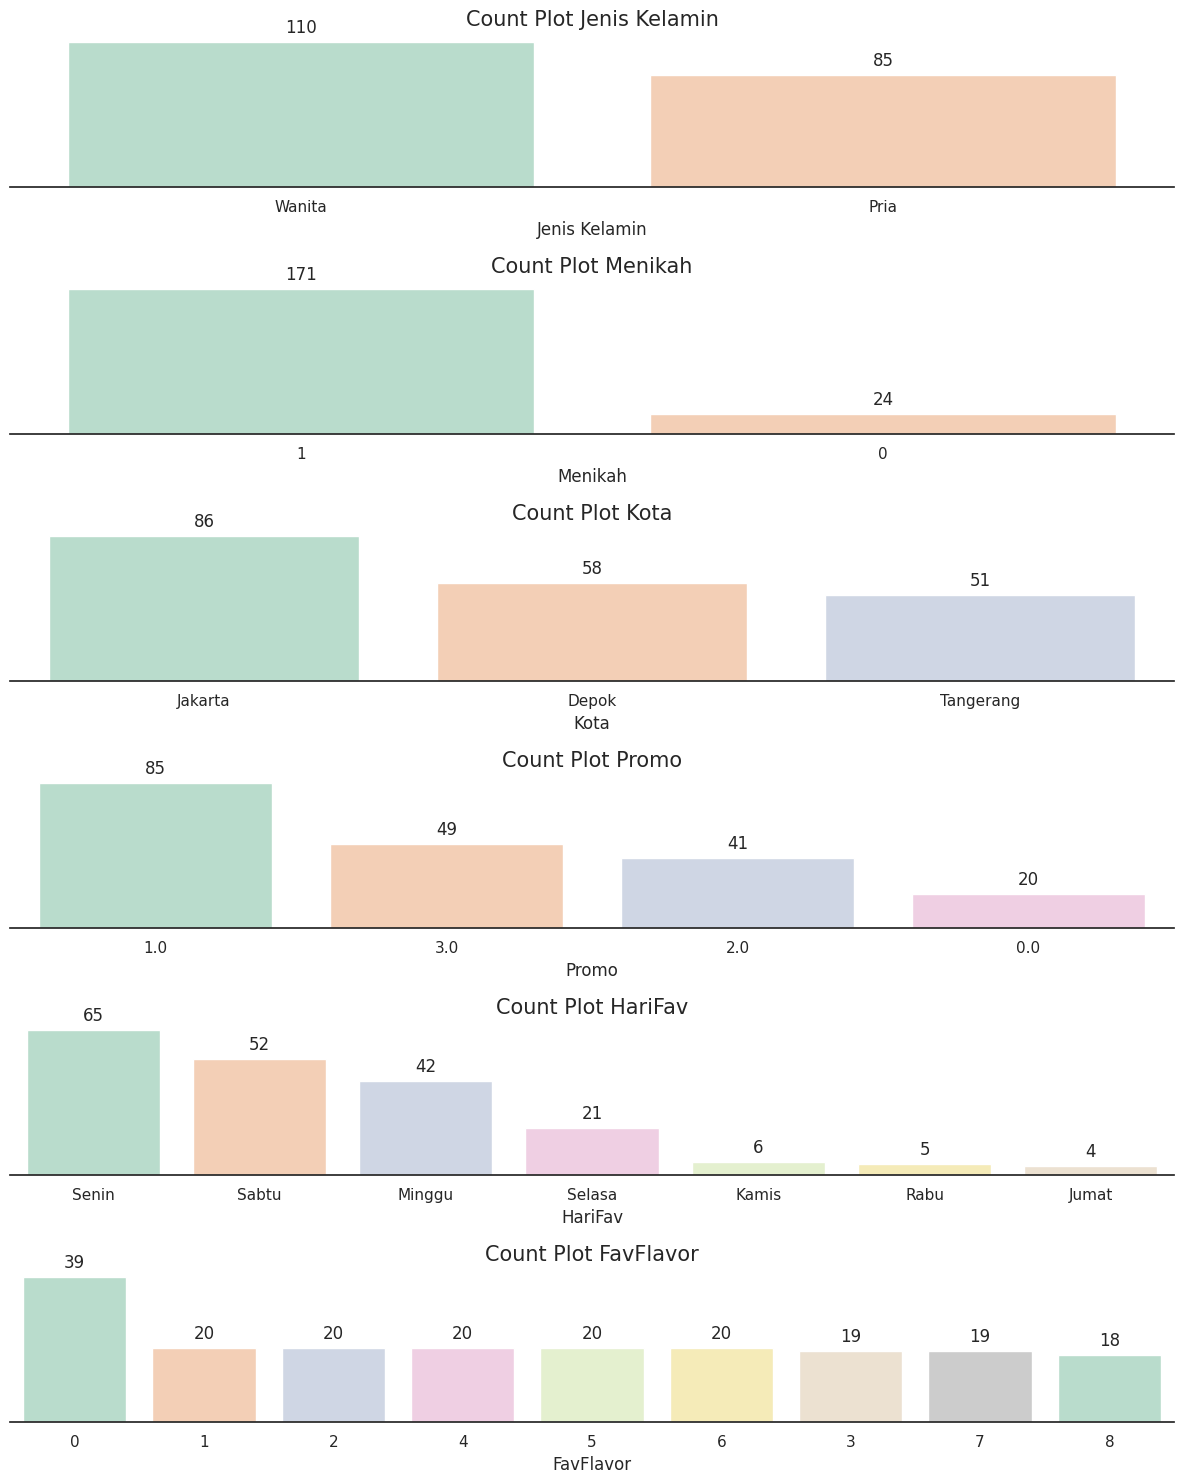

In [ ]:
# Define kolom_kategorik
kolom_kategorik = ['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']
sns.set(style='white')
plt.clf()

# Membuat canvas
fig, axs = plt.subplots(6, 1, figsize=(12, 15))

# Membuat plot untuk setiap kolom kategorikal
for i, kol2 in enumerate(kolom_kategorik):
    # Check if the column exists in the DataFrame
    if kol2 in df.columns:
        # Membuat Plot dengan palette warna
        sns.countplot(x=df[kol2], order=df[kol2].value_counts().index, ax=axs[i], palette="Pastel2")
        axs[i].set_title(f'Count Plot {kol2}', fontsize=15)
        axs[i].set_xlabel(kol2)  # Memberikan label pada sumbu-x
        axs[i].set_ylabel('Jumlah')  # Memberikan label pada sumbu-y

        # Memberikan anotasi
        for p in axs[i].patches:
            axs[i].annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10),
                            textcoords='offset points')

        # Setting Plot
        sns.despine(right=True, top=True, left=True)
        axs[i].axes.yaxis.set_visible(False)
        plt.setp(axs)
        plt.tight_layout()
    else:
        print(f"Column '{kol2}' not found in DataFrame. Skipping...")

# Tampilkan plot
plt.show()

### **Rumusan Masalah Nomor 1**
Bagaimana keterkaitan antara pendapatan bulanan dan skor pengeluaran? Apakah pelanggan dengan pendapatan lebih tinggi menunjukkan perilaku belanja yang lebih bijaksana atau lebih konsumtif di MixITup?

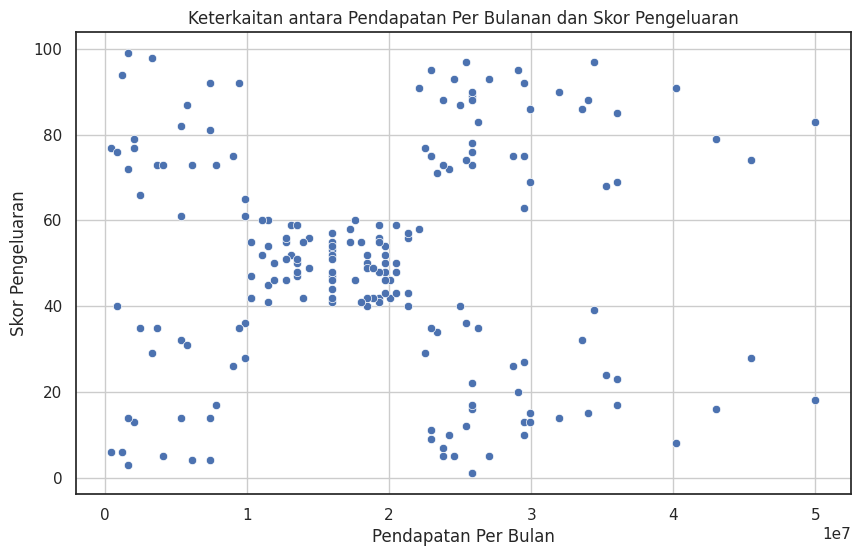

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', data=df)
plt.title('Keterkaitan antara Pendapatan Per Bulanan dan Skor Pengeluaran')
plt.xlabel('Pendapatan Per Bulan')
plt.ylabel('Skor Pengeluaran')
plt.grid()
plt.show()

###** Interpretasi**
Berdasarkan scatter plot, tidak ditemukan pola hubungan yang kuat antara pendapatan bulanan dan skor pengeluaran.
- Pelanggan dengan pendapatan rendah (1-10 juta) memiliki perilaku pengeluaran yang sangat beragam, sementara sebagian memiliki pengeluaran rendah dan sebagian memiliki pengeluaran tinggi
-  Pelanggan berpendapatan menengah (10-20 juta) menunjukan skor pengeluaran yang relatif stabil dikisaran sedang.
- Pelanggan berpendapatan tinggi (20-50 juta) juga tidak menunjukkan pola tertentu, ada yang memiliki skor pengeluaran tinggi maupun rendah.

Dengan demikian, dapat disimpulkan bahwa tidak terdapat keterkaitan yang jelas antara pendapatan bulanan dan skor pengeluaran pelanggan di MixITUp. Pendapatan yang lebih tinggi tidak selalu membuat pelanggan lebih bijaksana maupun lebih konsumtif.

### **Rumusan Masalah Nomor 2**
Bagaimana hubungan antara usia pelanggan dan preferensi hari belanja favorit? Apakah ada kecenderungan generasi tertentu yang lebih tertarik berbelanja di akhir pekan dibanding hari biasa?

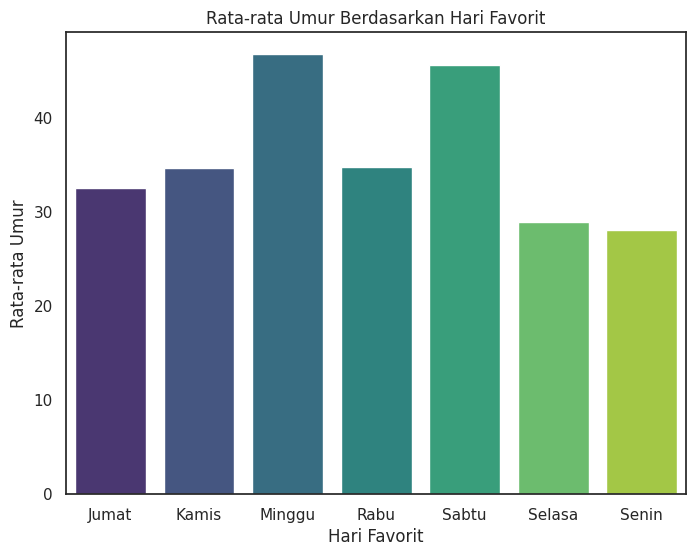

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x= 'HariFav', y = 'Umur', data = df, palette = 'viridis', ci = None)
plt.title('Rata-rata Umur Berdasarkan Hari Favorit')
plt.xlabel('Hari Favorit')
plt.ylabel('Rata-rata Umur')
plt.show()

### **Interpretasi**
- Hari sabtu dan minggu: terlihat bahwa pelanggan dengan usia lebih tua dengan rata-rata usia sekitar 40 tahun ke atas lebih suka berbelanja di akhir pekan, terutama pada hari Sabtu dan Minggu
- Hari senin-jumat: terlihat bahwa pelanggan muda dengan rata-rata usia sekitar 30 tahun lebih sering berbelanja di hari kerja.

Dari data MixITUp, terlihat bahwa pelanggan berusia lebih tua lebih suka berbelanja di akhir pekan, terutama hari Sabtu dan Minggu. Sementara itu, pelanggan muda lebih sering berbelanja di hari kerja.

### **Rumusan Masalah Nomor 3**
Sejauh mana efektivitas promo MixITup dalam mempengaruhi perilaku pembelian, terutama pada pelanggan dengan skor pengeluaran yang rendah? Apakah promo lebih berdampak pada segmen pelanggan tertentu?

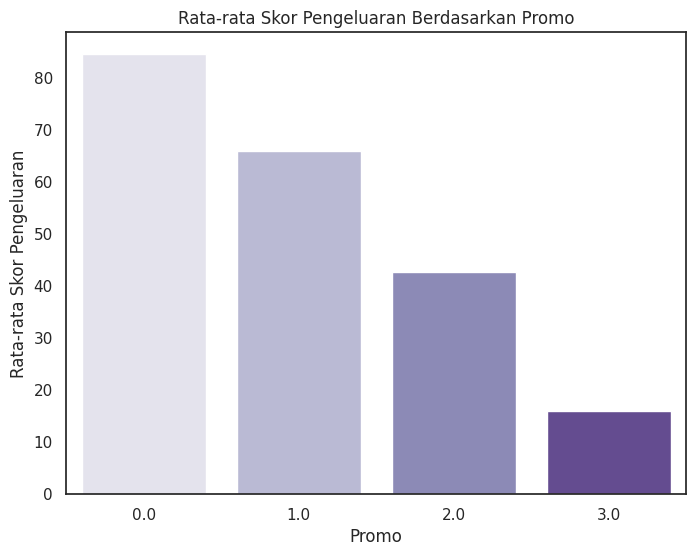

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x= 'Promo', y = 'skor-pengeluaran', data = df, palette = 'Purples', ci = None)
plt.title('Rata-rata Skor Pengeluaran Berdasarkan Promo')
plt.xlabel('Promo')
plt.ylabel('Rata-rata Skor Pengeluaran')
plt.show()

### **Interpretasi**
- Pelanggan dengan skor pengeluaran 15 Sering menggunakan promo artinya
Promo lebih efektif untuk pelanggan ini, karena mereka sering memanfaatkan promo untuk melakukan pembelian, meskipun total pengeluarannya rendah.

- Pelanggan dengan skor pengeluaran 45 cukup sering(sedang) menggunakan promo, Ini menunjukkan bahwa promo cukup efektif dalam meningkatkan pembelian mereka, namun tidak menyebabkan mereka melakukan pembelian lebih sering atau dalam jumlah yang sangat besar.

- Pelanggan dengan skor pengeluaran tinggi sekitar  65 jarang menggunakan promo, artinya
Promo kurang efektif pada pelanggan ini, karena meskipun jarang menggunakan promo, mereka tetap melakukan pembelian dalam jumlah besar.

- Pelanggan dengan skor pengeluaran tertinggi sekitar 80 Tidak pernah menggunakan promo, artinya Promo tidak efektif untuk segmen ini, karena mereka tidak memanfaatkan promo sama sekali namun tetap memiliki pengeluaran tinggi.

Dapat disimpulkan promo lebih berdampak pada pelanggan dengan skor pengeluaran rendah, sementara pelanggan dengan pengeluaran tinggi tidak terlalu terpengaruh oleh promo.

### **Rumusan Masalah Nomor 4**
Apakah status pernikahan memoderasi pengaruh pendapatan terhadap skor pengeluaran pelanggan di MixITup? Misalnya, apakah pelanggan yang sudah menikah dengan pendapatan tinggi lebih konservatif dalam pengeluaran dibanding yang belum menikah?

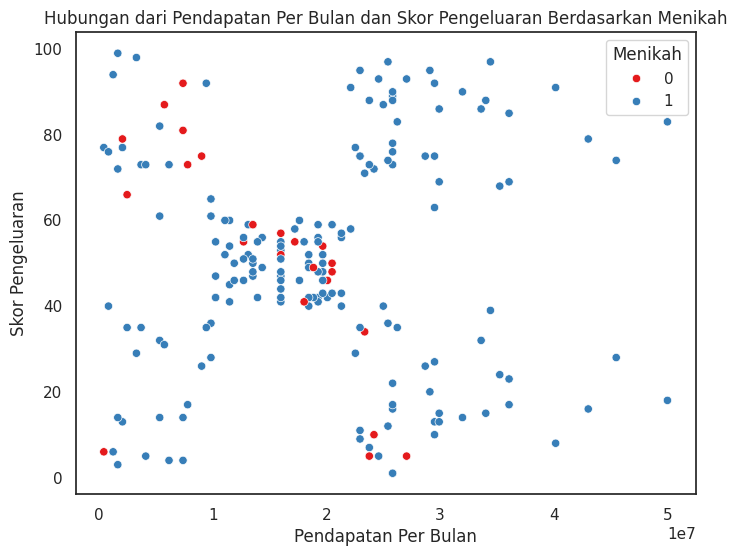

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', hue='Menikah', data=df, palette='Set1')

plt.title('Hubungan dari Pendapatan Per Bulan dan Skor Pengeluaran Berdasarkan Menikah')
plt.xlabel('Pendapatan Per Bulan')
plt.ylabel('Skor Pengeluaran')

plt.show()

### **Interpretasi**
- Pelanggan yang sudah menikah (titik biru) tersebar di seluruh rentang pendapatan dengan skor pengeluaran yang bervariasi. Tidak tampak kecenderungan kuat bahwa mereka lebih konservatif; bahkan sebagian pelanggan berpendapatan tinggi tetap memiliki skor pengeluaran tinggi.
- Pelanggan yang belum menikah (titik merah) umumnya berada pada pendapatan yang lebih rendah, namun sebagian menunjukkan skor pengeluaran yang tinggi, menandakan perilaku konsumtif pada kelompok berpendapatan yang lebih rendah.
- Secara keseluruhan, tidak ada pola yang konsisten yang menunjukkan bahwa status pernikahan memoderasi hubungan antara pendapatan dan skor pengeluaran.

Status pernikahan tidak berpengaruh signifikan dalam memperkuat atau melemahkan hubungan antara pendapatan dan perilaku pengeluaran pelanggan di MixITUp. Pola pengeluaran relatif beragam di setiap kelompok pendapatan, baik bagi pelanggan yang menikah maupun yang belum menikah.


### **Rumusan Masalah Nomor 5**
Apakah pelanggan dari kota besar seperti Jakarta cenderung menggunakan lebih banyak promo dibanding kota kecil, dan apakah ini berkaitan dengan kebijakan pemasaran lokal MixITup?

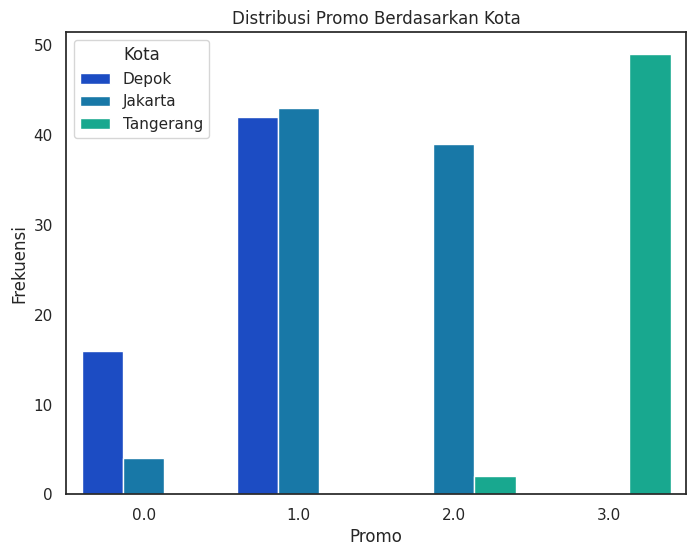

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Promo', hue='Kota', palette='winter')
plt.title('Distribusi Promo Berdasarkan Kota')
plt.xlabel('Promo')
plt.ylabel('Frekuensi')
plt.legend(title='Kota')
plt.show()

### **Interpretasi**
- Di Kota Depok, terdapat sekitar 16 pelanggan yang tidak pernah menggunakan promo dan sekitar 42 pelanggan yang jarang menggunakan promo.
- Di Kota Jakarta, terdapat sekitar 4 pelanggan yang tidak pernah menggunakan promo, sekitar 43 pelanggan yang jarang menggunakan promo, serta sekitar 39 pelanggan yang cukup sering menggunakan promo.
- Di Kota Tangerang, terdapat sekitar 2 pelanggan yang cukup sering menggunakan promo dan sekitar 49 pelanggan yang sangat sering menggunakan promo.

Pelanggan dari kota besar seperti Jakarta memang cenderung menggunakan promo lebih banyak dibandingkan kota lain, namun menariknya, pelanggan di Tangerang—yang juga termasuk dalam kawasan metropolitan menunjukkan tingkat penggunaan promo yang lebih tinggi dan konsisten.Hal ini mengindikasikan bahwa meskipun pelanggan di kota besar memiliki kecenderungan untuk memanfaatkan promo, faktor lokal seperti strategi pemasaran, kesadaran merek, serta kebiasaan belanja juga berperan penting dalam memengaruhi perilaku tersebut.
Dengan demikian, perilaku penggunaan promo di kota-kota besar seperti Jakarta dan Tangerang dapat berkaitan dengan strategi pemasaran yang diterapkan di masing-masing area.

# **Customer Segmentation**

##**Standarisasi variabel**


In [ ]:
#Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_std.describe().round(0))


Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  195.0                 195.0             195.0
mean    37.3            18913408.5              50.5
std     11.9            10654303.0              25.8
min      2.0              409836.0               1.0
25%     29.0            11270491.0              35.0
50%     36.0            19262295.0              50.0
75%     48.0            25819672.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

         Umur  Pendapatan-per-bulan  skor-pengeluaran
ID                                                   
101  0.982416             -0.545656          0.060107
102 -0.450364              1.382631          1.379684
103  1.150978             -0.275696         -0.366814
104 -1.546019             -0.584221          0.176541
105  0.055323              0.109962         -0.328003

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  1

In [ ]:
# Membuat salinan data frame
kolom_kategorik = [ 'Kota', 'Promo']
df_encode = df[kolom_kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kategorik:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

     Kota  Promo
ID              
101     1      1
102     0      1
103     1      2
104     1      1
105     1      2


In [ ]:
#Menggabungkan data frame
df_final = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_final.head())


     Kota  Promo      Umur  Pendapatan-per-bulan  skor-pengeluaran
ID                                                                
101     1      1  0.982416             -0.545656          0.060107
102     0      1 -0.450364              1.382631          1.379684
103     1      2  1.150978             -0.275696         -0.366814
104     1      1 -1.546019             -0.584221          0.176541
105     1      2  0.055323              0.109962         -0.328003


In [ ]:
# Menampilkan informasi umum tentang dataframe df_final
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 101 to 300
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kota                  195 non-null    int64  
 1   Promo                 195 non-null    int64  
 2   Umur                  195 non-null    float64
 3   Pendapatan-per-bulan  195 non-null    float64
 4   skor-pengeluaran      195 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 9.1 KB


##**Clustering Menggunakan Algoritma K-Prototypes**

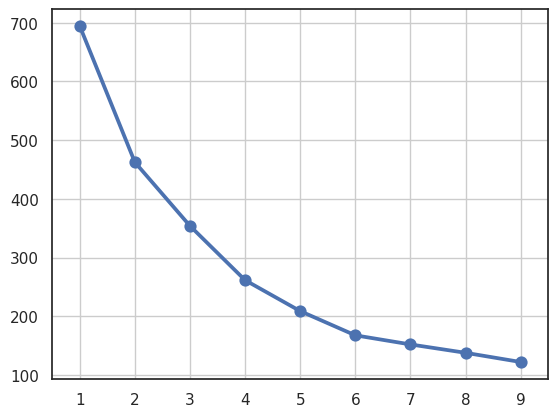

In [ ]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  kproto = KPrototypes(n_clusters = k, random_state = 75)
  kproto.fit_predict(df_final, categorical = [0,1])
  cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

In [ ]:
# Membuat objek model K-Prototypes dengan jumlah cluster sebanyak 4
# dan menetapkan nilai random_state = 60 agar hasil clustering konsisten setiap kali dijalankan
Kproto = KPrototypes(n_clusters = 4, random_state = 60)

# Melatih (fit) model K-Prototypes pada dataset df_final
# dengan menentukan kolom kategorikal pada indeks ke-0 dan ke-1
kproto = Kproto.fit(df_final, categorical = [0,1])

# Menyimpan model yang telah dilatih ke dalam file bernama 'cluster.pkl'
# agar dapat digunakan kembali tanpa perlu melakukan pelatihan ulang
pickle.dump(kproto, open('cluster.pkl', 'wb'))


In [ ]:
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_final, categorical = [0,1])
print('Segmen Pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final_cluster = df.copy()
df_final_cluster['cluster'] = clusters

Segmen Pelanggan: [3 0 3 1 3 0 1 1 1 1 1 0 2 3 3 2 0 3 3 1 1 3 2 0 1 3 1 1 0 1 0 0 3 1 2 1 0
 3 1 3 1 0 2 0 3 1 2 3 1 3 1 3 3 3 3 3 3 2 3 1 3 3 3 1 3 0 3 1 0 3 3 3 2 1
 2 3 0 0 1 0 3 0 2 3 3 3 1 3 0 2 2 3 2 2 0 3 3 3 1 3 2 2 3 3 3 1 1 1 1 1 0
 1 3 3 2 3 3 0 1 3 3 2 2 2 1 3 2 3 1 1 2 1 3 3 0 1 1 3 0 1 2 2 0 1 3 1 3 2
 0 2 1 0 1 3 0 0 3 0 1 0 3 0 3 0 0 1 0 1 2 3 1 0 2 2 1 1 0 2 0 2 1 2 3 3 3
 2 1 0 3 1 1 3 0 1 3]



In [ ]:
# Menampilkan beberapa baris awal dari DataFrame hasil clustering
df_final_cluster

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,cluster
ID,,,,,,,,,,
101,Wanita,49,13114754.0,52,1,Jakarta,1.0,Sabtu,2,3
102,Wanita,32,33606557.0,86,1,Depok,1.0,Minggu,6,0
103,Pria,51,15983606.0,41,1,Jakarta,2.0,Minggu,3,3
104,Pria,19,12704918.0,55,0,Jakarta,1.0,Rabu,7,1
105,Wanita,38,20081967.0,42,1,Jakarta,2.0,Senin,8,3
...,...,...,...,...,...,...,...,...,...,...
296,Pria,31,4098360.0,73,1,Depok,1.0,Senin,0,1
297,Pria,57,15983606.0,51,1,Jakarta,1.0,Minggu,5,3
298,Wanita,35,43032786.0,79,1,Depok,1.0,Senin,7,0


##**Analisis Cluster**

In [ ]:

# Menampilkan ringkasan data untuk cluster 0
df_final_cluster[(df_final_cluster['cluster'] == 0)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,39,2,Wanita,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,39.0,NaN,NaN,NaN,32.692308,3.72865,27.0,30.0,32.0,35.5,40.0
Pendapatan-per-bulan,39.0,NaN,NaN,NaN,29319041.128205,6685444.679798,22131147.0,24795081.5,26229508.0,32786885.0,50000000.0
skor-pengeluaran,39.0,NaN,NaN,NaN,82.128205,9.364489,63.0,74.5,83.0,90.0,97.0
Menikah,39,1,1,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,39,2,Depok,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,39.0,2.0,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,39,6,Senin,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,39.0,9.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,39.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Menampilkan ringkasan data untuk cluster 1
df_final_cluster[(df_final_cluster['cluster'] == 1)].describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,55,2,Wanita,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,55.0,NaN,NaN,NaN,25.218182,6.338276,2.0,21.0,24.0,30.5,38.0
Pendapatan-per-bulan,55.0,NaN,NaN,NaN,11005960.818182,7020324.265599,409836.0,4713114.0,10245901.0,17827868.0,25000000.0
skor-pengeluaran,55.0,NaN,NaN,NaN,60.4,18.216395,6.0,48.5,56.0,73.0,99.0
Menikah,55,2,1,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,55,3,Jakarta,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,55.0,4.0,1.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,55,7,Senin,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,55.0,9.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,55.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Menampilkan ringkasan data untuk cluster 2
df_final_cluster[(df_final_cluster['cluster'] == 2)].describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,33,2,Pria,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,33.0,NaN,NaN,NaN,39.878788,11.599455,19.0,34.0,41.0,47.0,59.0
Pendapatan-per-bulan,33.0,NaN,NaN,NaN,30178837.030303,6905781.973812,22540983.0,25409836.0,29098360.0,34016393.0,50000000.0
skor-pengeluaran,33.0,NaN,NaN,NaN,16.424242,9.604785,1.0,10.0,15.0,23.0,39.0
Menikah,33,2,1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,33,2,Tangerang,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,33.0,2.0,3.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,33,5,Senin,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,33.0,9.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,33.0,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
# Menampilkan ringkasan data untuk cluster 3
df_final_cluster[(df_final_cluster['cluster'] == 3)].describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Jenis Kelamin,68,2,Wanita,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Umur,68.0,NaN,NaN,NaN,48.588235,6.358061,35.0,45.0,49.0,53.0,60.0
Pendapatan-per-bulan,68.0,NaN,NaN,NaN,13874155.779412,6180388.901697,1229508.0,9836065.0,14139344.0,19262295.0,26229508.0
skor-pengeluaran,68.0,NaN,NaN,NaN,40.75,15.485549,3.0,35.0,45.5,51.25,60.0
Menikah,68,1,1,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kota,68,2,Jakarta,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Promo,68.0,3.0,2.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HariFav,68,6,Sabtu,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FavFlavor,68.0,9.0,3.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,68.0,NaN,NaN,NaN,3.0,0.0,3.0,3.0,3.0,3.0,3.0


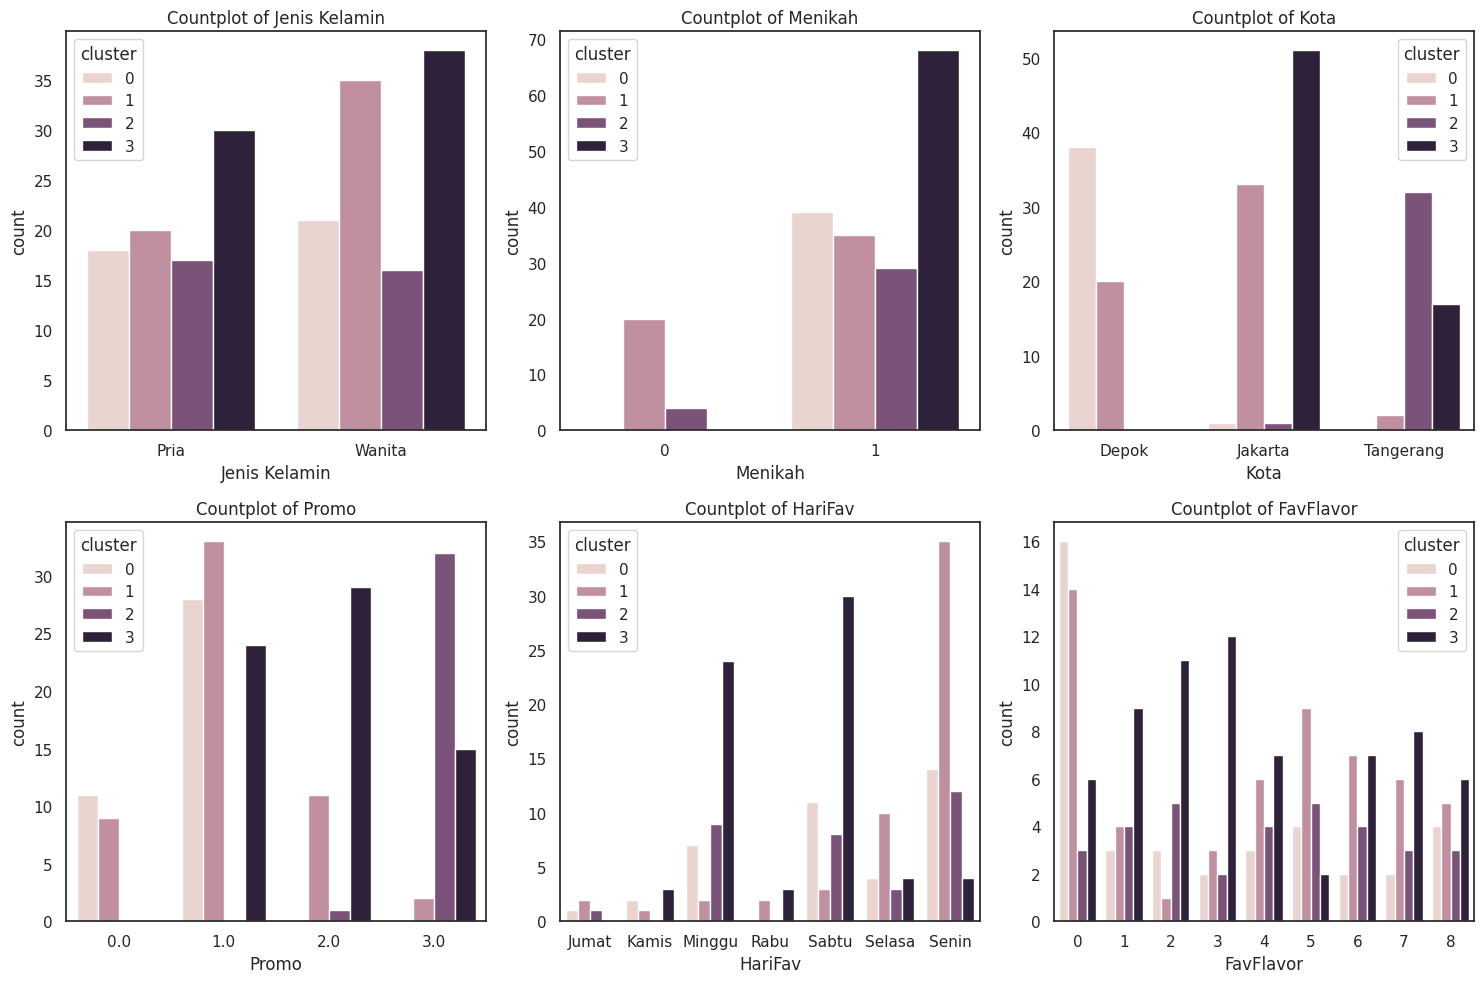

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    # Assuming 'cluster' column contains the cluster assignments from k-means++
    sns.countplot(data=df_final_cluster, x=column, ax=ax[i], hue='cluster')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

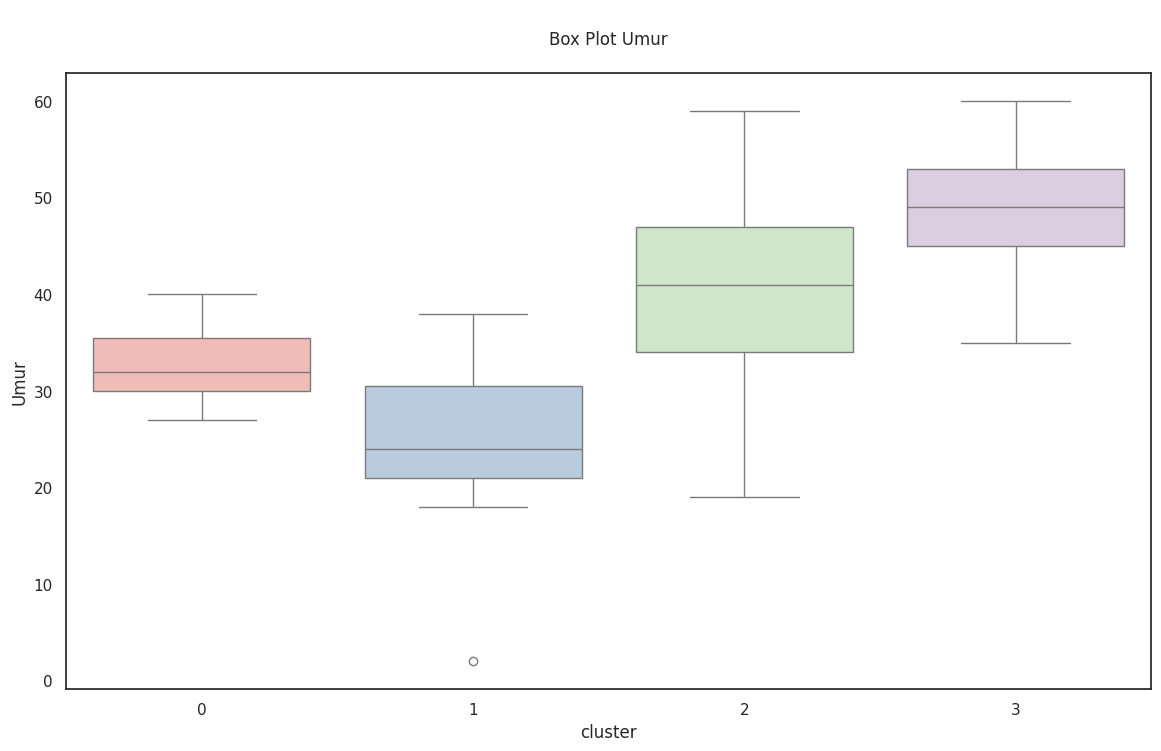

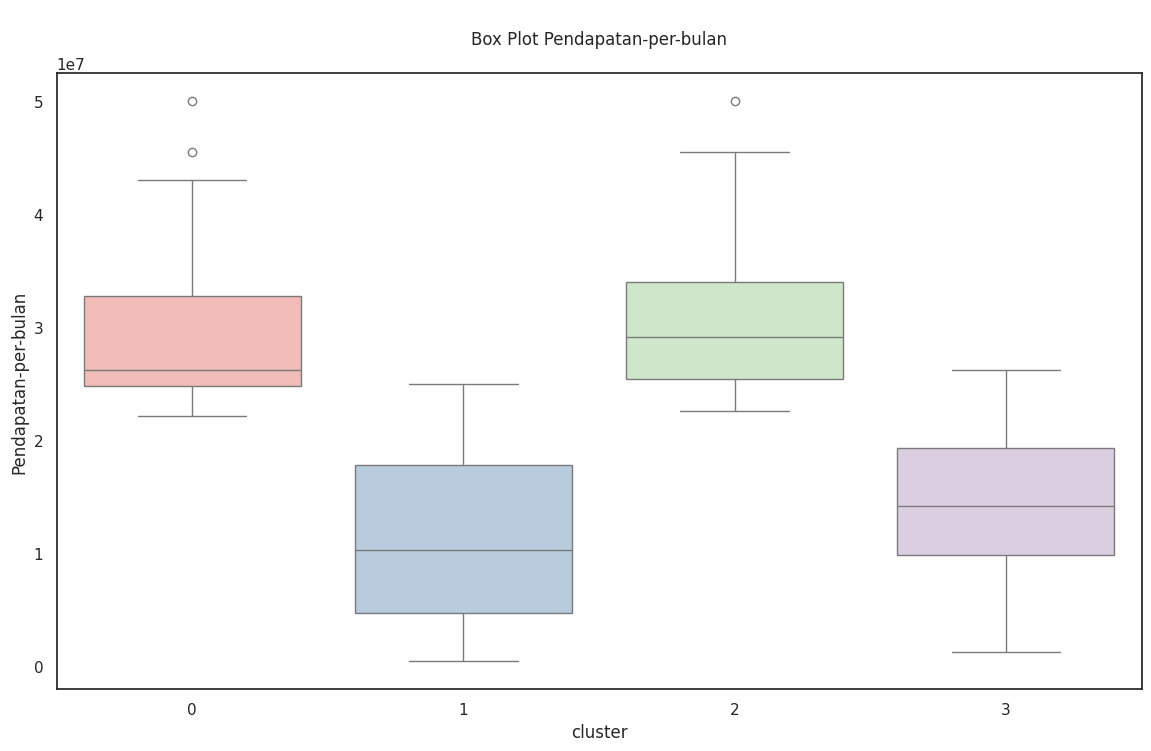

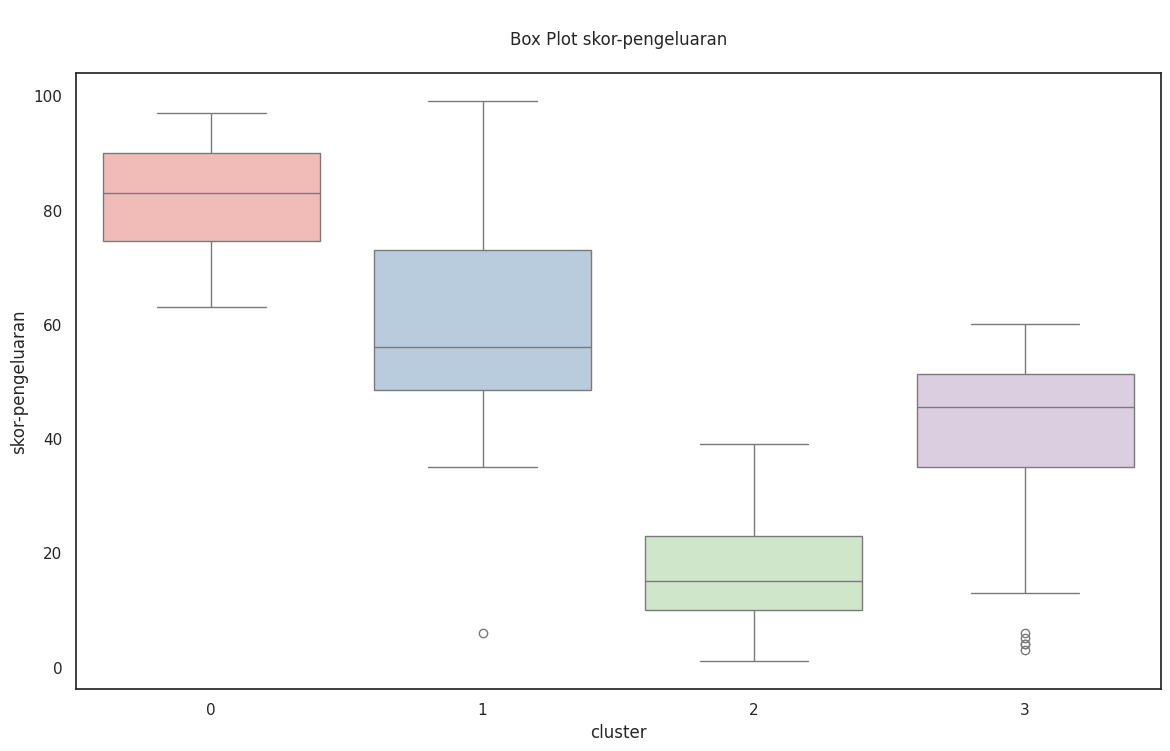

In [ ]:
# Menampilkan boxplot untuk setiap kolom numerik berdasarkan cluster
for i in kolom_numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x='cluster', y=i, data=df_final_cluster, palette="Pastel1")
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()


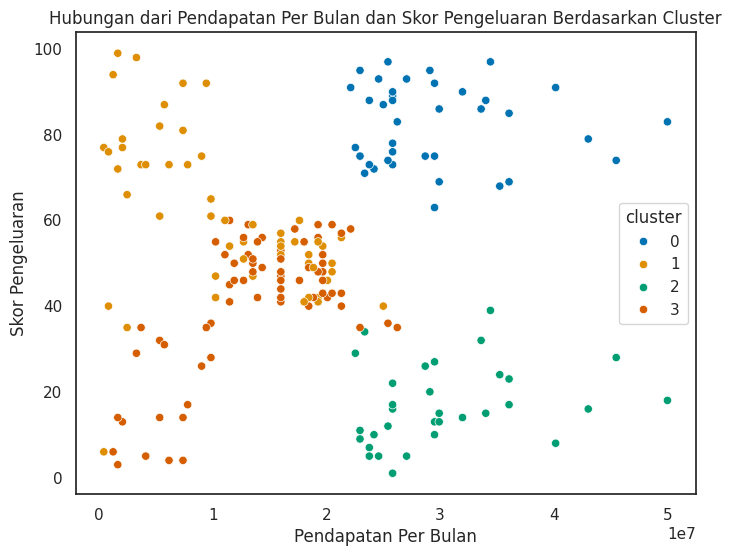

In [ ]:
# Menampilkan sebaran data (scatter plot) antara pendapatan per bulan dan skor pengeluaran berdasarkan cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pendapatan-per-bulan', y='skor-pengeluaran', hue='cluster', data=df_final_cluster, palette='colorblind')

plt.title('Hubungan dari Pendapatan Per Bulan dan Skor Pengeluaran Berdasarkan Cluster')
plt.xlabel('Pendapatan Per Bulan')
plt.ylabel('Skor Pengeluaran')

plt.show()


##**Kesimpulan Analisis Cluster Pelanggan:**

Cluster 0 terdiri atas pelanggan berpendapatan menengah dengan tingkat pengeluaran tinggi, didominasi oleh pelanggan dari Jakarta dan sebagian dari Depok. Mereka jarang memanfaatkan promo dan memiliki usia rata-rata sekitar 25 tahun. Temuan ini menunjukkan bahwa pelanggan muda di Jakarta cenderung mengalokasikan pengeluaran untuk gaya hidup atau kebutuhan tertentu, sehingga penawaran produk premium atau pengalaman eksklusif berpotensi menarik minat mereka.

Cluster 1 mencakup pelanggan berpendapatan menengah dengan pengeluaran sedang, sebagian besar tinggal di Jakarta dan sering menggunakan promo, terutama pada akhir pekan. Usia rata-rata kelompok ini sekitar 48 tahun dengan status pernikahan sudah menikah. Karakteristik ini mengindikasikan bahwa pelanggan dewasa lebih responsif terhadap promo dan diskon, sehingga strategi pemasaran berbasis promosi menjadi efektif untuk mempertahankan serta menarik pelanggan pada kelompok ini.

Cluster 2 beranggotakan pelanggan berpendapatan tinggi dengan tingkat pengeluaran tinggi, didominasi oleh warga Depok yang jarang memanfaatkan promo. Usia rata-rata kelompok ini sekitar 32 tahun. Hal ini memperlihatkan bahwa pelanggan berpendapatan tinggi di Depok cenderung lebih percaya diri dalam berbelanja tanpa bergantung pada promo, sehingga strategi yang menonjolkan produk eksklusif atau layanan premium lebih sesuai diterapkan pada segmen ini.

Cluster 3 terdiri atas pelanggan berpendapatan tinggi dengan tingkat pengeluaran rendah, sebagian besar tinggal di Tangerang dan sering memanfaatkan promo, terutama yang telah menikah. Usia rata-rata kelompok ini sekitar 40 tahun. Meskipun memiliki pendapatan tinggi, pelanggan ini lebih berhati-hati dalam mengelola pengeluaran. Pendekatan pemasaran berupa program loyalitas atau penawaran dengan nilai tambah dapat mendorong peningkatan minat belanja pada kelompok ini.

#**Rekomendasi ke MixITup**

**Rekomendasi Pengembangan Wilayah**

Berdasarkan hasil analisis karakteristik pelanggan, direkomendasikan tiga kota prioritas untuk pengembangan, yaitu **Depok**, **Jakarta**, dan **Tangerang**. Adapun strategi yang disarankan untuk masing-masing kota adalah sebagai berikut:

**1. Jakarta**
Terdapat dua segmen utama pelanggan di Jakarta, yaitu pelanggan muda yang umumnya berkunjung pada hari Senin, serta pelanggan berusia lebih dewasa dan telah menikah yang lebih sering datang pada akhir pekan (Sabtu dan Minggu). Untuk menarik minat kedua segmen tersebut, disarankan agar desain ruangan dibuat **instagramable** guna menarik pelanggan muda, namun tetap mempertahankan kenyamanan dan suasana yang ramah keluarga bagi pelanggan dewasa. Selain itu, **program promosi bertema “family bundle”** yang diluncurkan khusus pada akhir pekan dapat menjadi strategi efektif untuk meningkatkan kunjungan keluarga.

**2. Depok**
Pelanggan di Depok memiliki tingkat pengeluaran tinggi dan jarang memanfaatkan promo. Kondisi ini menunjukkan bahwa mereka lebih menilai kualitas dibandingkan harga. Oleh karena itu, strategi pemasaran sebaiknya difokuskan pada peningkatan **kualitas produk dan pengalaman premium** yang memberikan kesan eksklusif, tanpa bergantung pada penawaran diskon atau promosi.

**3. Tangerang**
Di Tangerang, pelanggan memiliki tingkat pendapatan tinggi namun menunjukkan kecenderungan berbelanja hanya saat terdapat promo. Untuk mengubah perilaku tersebut, disarankan agar **program promosi rutin** dijadikan strategi utama guna menarik perhatian dan meningkatkan penjualan. Selain berfungsi sebagai daya tarik awal, promo juga dapat memperkuat **loyalitas pelanggan** dengan memberikan insentif berkelanjutan bagi mereka yang sudah berpenghasilan tinggi namun selektif dalam pengeluaran.


#**Kelebihan dan Kekurangan Customer Segmentation Berdasarkan Rekomendasi**

**Analisis Kelebihan dan Kekurangan Strategi Pengembangan per Kota**

**1. Jakarta**

**Kelebihan:**

* Penerapan dekorasi yang *instagramable* berpotensi menarik pelanggan muda yang mengutamakan estetika dan pengalaman berbelanja yang menarik.
* Program **family bundle** pada akhir pekan dapat meningkatkan penjualan dengan menarik segmen keluarga yang sering berkunjung pada hari Sabtu dan Minggu.
* Penyediaan ruang yang nyaman dan ramah keluarga akan mendorong frekuensi kunjungan yang lebih tinggi serta menjadikan toko sebagai destinasi pilihan untuk kegiatan keluarga.

**Kekurangan:**

* Menggabungkan dua segmen pelanggan (muda dan keluarga) dalam satu area dapat menjadi tantangan karena perbedaan preferensi terhadap suasana dan desain interior.
* Promosi **family bundle** yang dilakukan terlalu sering berpotensi menurunkan citra premium produk, terutama jika disertai dengan terlalu banyak potongan harga atau penawaran khusus.

**2. Depok**

**Kelebihan:**

* Fokus pada peningkatan kualitas produk dan pengalaman berbelanja premium mampu menarik pelanggan berpendapatan tinggi tanpa perlu menawarkan promo, sehingga berpotensi meningkatkan margin keuntungan.
* Strategi ini sesuai dengan karakter pelanggan yang mengutamakan kualitas dan keistimewaan dibandingkan harga, sehingga dapat memperkuat posisi toko sebagai penyedia produk eksklusif.

**Kekurangan:**

* Ketiadaan promosi atau diskon dapat membuat toko tampak kurang kompetitif dibandingkan pesaing yang menawarkan penawaran menarik, sehingga sebagian pelanggan potensial mungkin enggan berkunjung.
* Upaya peningkatan kualitas produk dan layanan premium biasanya membutuhkan biaya tambahan, yang berisiko mempersempit pasar apabila harga menjadi terlalu tinggi bagi sebagian pelanggan.

**3. Tangerang**

**Kelebihan:**

* Penyelenggaraan promo secara rutin dapat menarik perhatian pelanggan yang sensitif terhadap harga, sehingga berpotensi meningkatkan volume penjualan dalam jangka pendek.
* Program promosi yang konsisten mampu membangun loyalitas pelanggan dan mendorong kebiasaan berbelanja yang lebih sering pada kelompok pelanggan dengan tingkat pengeluaran rendah.

**Kekurangan:**

* Ketergantungan berlebihan terhadap promo dapat menurunkan persepsi nilai produk, di mana pelanggan hanya tertarik berbelanja saat ada potongan harga, bukan karena kualitas produk itu sendiri.
* Promosi yang dilakukan terus-menerus dapat mengurangi tingkat keuntungan apabila margin produk terlalu tipis atau jika peningkatan volume penjualan tidak sebanding dengan biaya promosi yang dikeluarkan.
